In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"machine_failure_data.csv")

In [3]:
df.head(n=2)

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,M,298.1,323.740741,1551,42.8,0,0
1,2,L,298.2,324.111111,1408,46.3,3,0


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df["UDI"].nunique()

10000

In [6]:
df.drop(["UDI"], axis=1, inplace=True)

In [7]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,M,298.1,323.740741,1551,42.8,0,0
1,L,298.2,324.111111,1408,46.3,3,0
2,L,298.1,323.370370,1498,49.4,5,0
3,L,298.2,323.740741,1433,39.5,7,0
4,L,298.2,324.111111,1408,40.0,9,0


In [8]:
df.isna().sum()

Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Failure                0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

df["Type"] = LabelEncoder().fit_transform(df["Type"])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df.drop(['Failure'], axis=1)
y = df['Failure']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [11]:
print(x_train.shape, x_test.shape)

(7000, 6) (3000, 6)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

    

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [13]:
from sklearn.metrics import classification_report

y_train_pred_dt = model_dt.predict(x_train)
y_test_pred_dt = model_dt.predict(x_test)

print(classification_report(y_train, y_train_pred_dt))
print('\n')
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6763
           1       1.00      1.00      1.00       237

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2898
           1       0.60      0.67      0.63       102

    accuracy                           0.97      3000
   macro avg       0.79      0.83      0.81      3000
weighted avg       0.98      0.97      0.97      3000



In [ ]:
feature_names = list(x_train)
importances = model_dt.feature_importances_
indicies = np.argsort(importances)

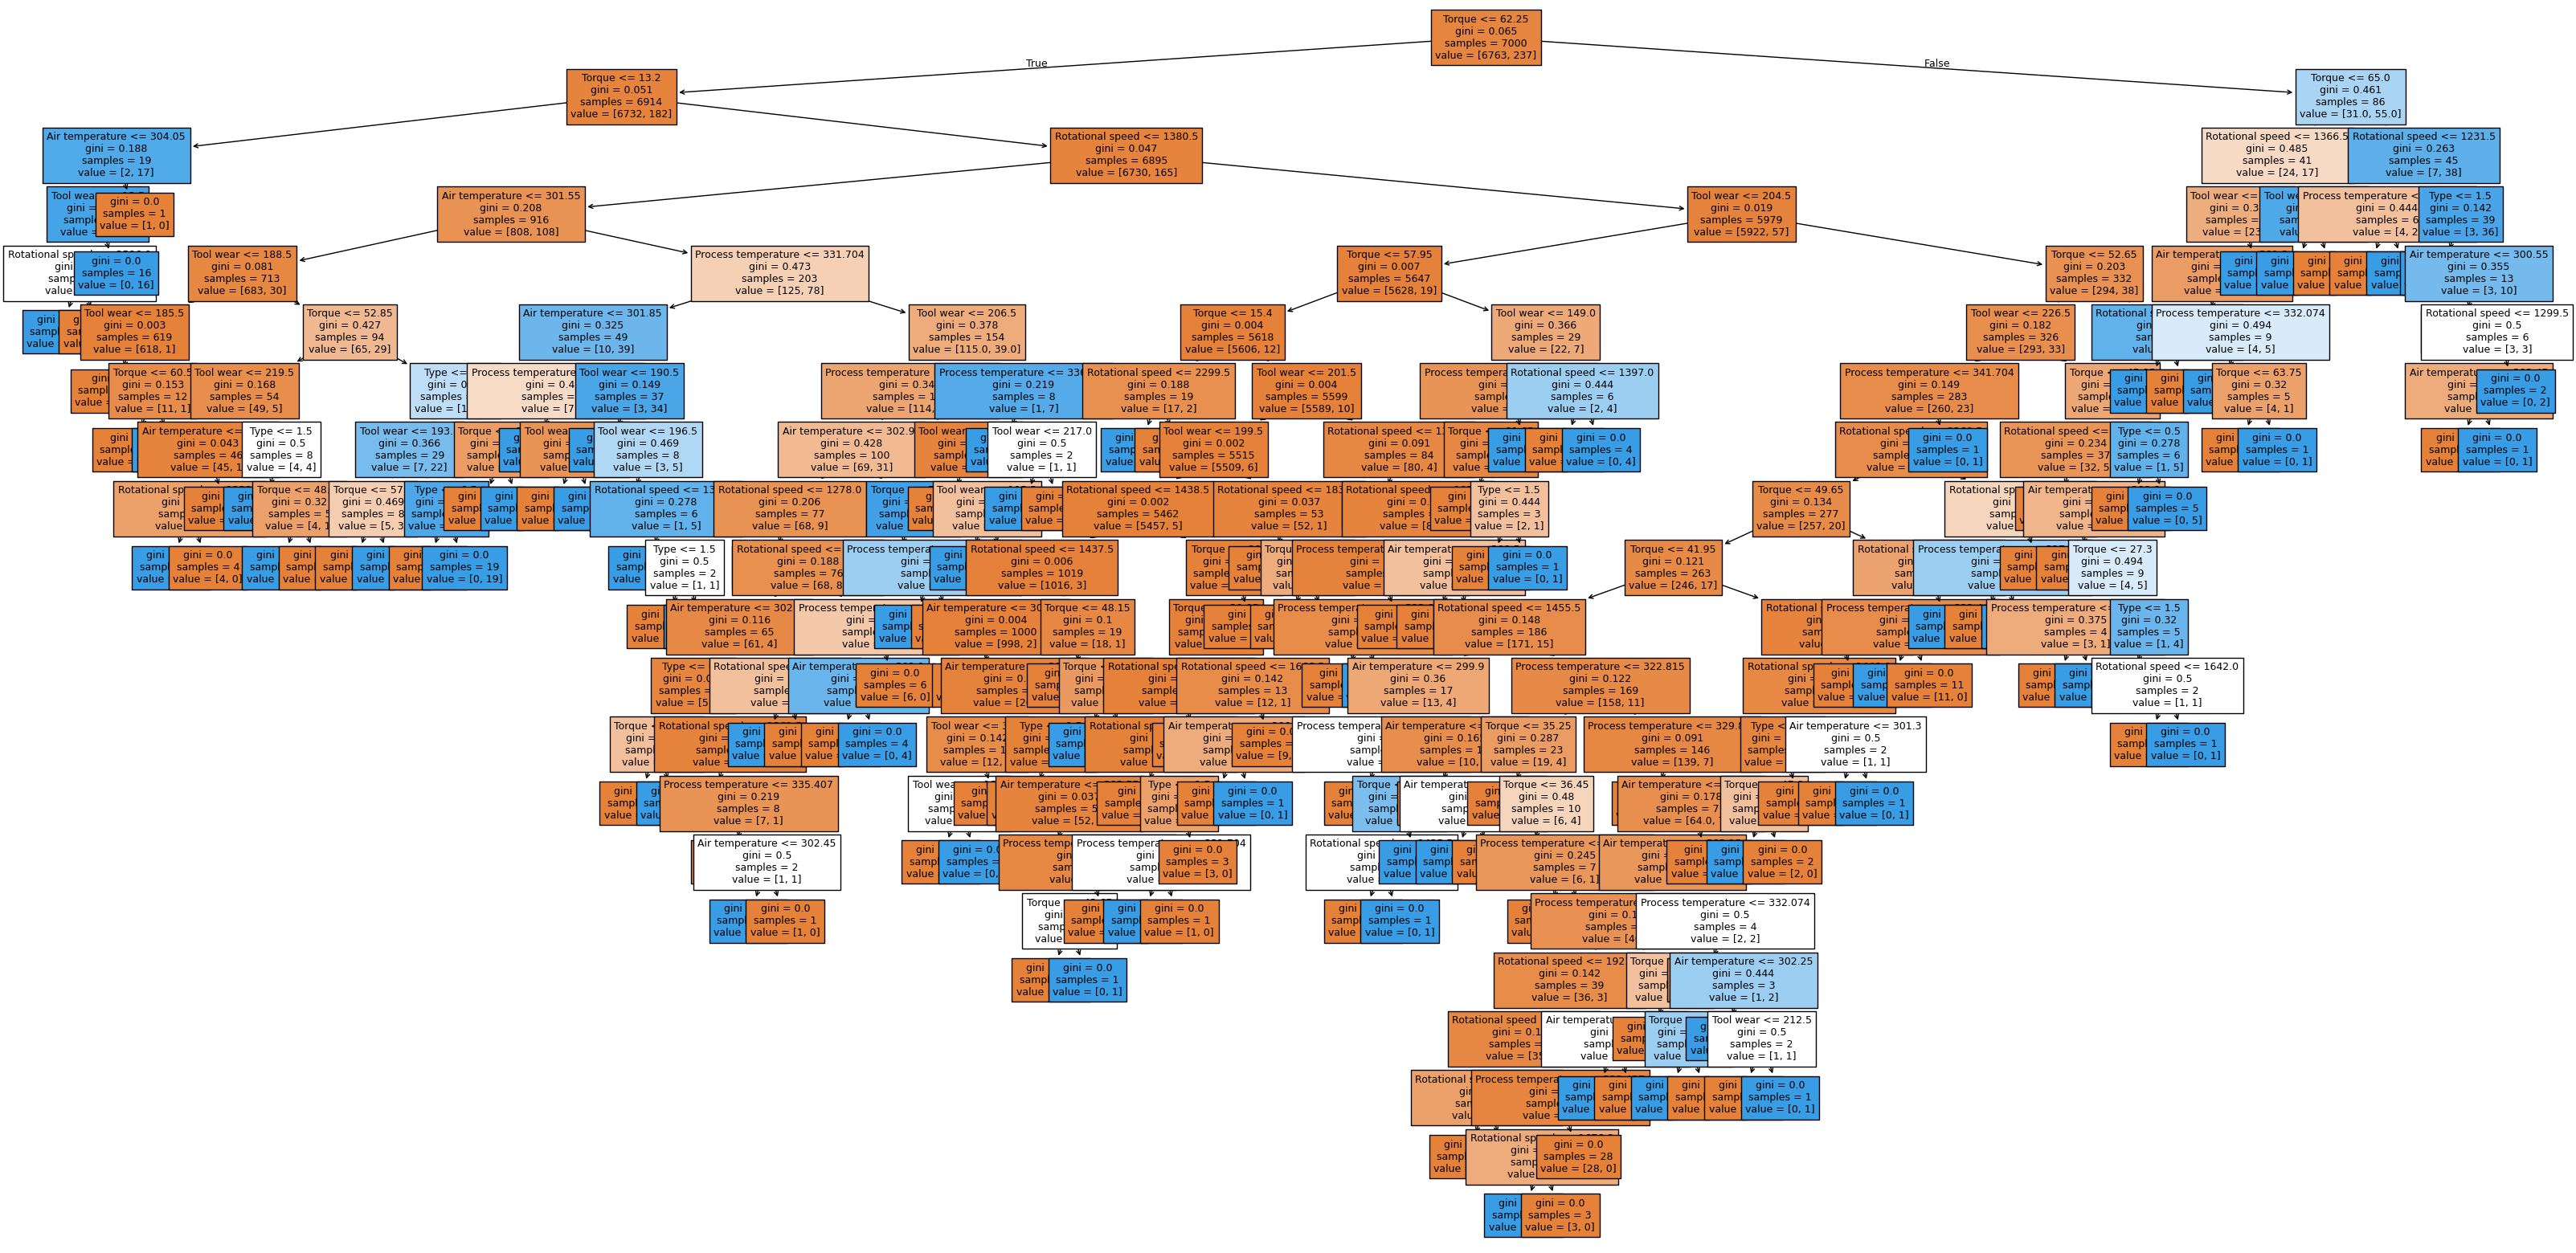

In [ ]:
from sklearn import tree

plt.figure(figsize=(40,20))

out = tree.plot_tree(
    model_dt,
    feature_names=feature_names,
    fontsize=9,
    filled=True,
    node_ids=False,
    class_names=None
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

In [ ]:
from sklearn.metrics import recall_score

max_depth_values = np.arange(2,7,2)
max_leaf_nodes_values = [50, 100, 200]
min_sample_split_values = [10, 40, 70]

best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0



for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_sample_split_values:

            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            estimator.fit(x_train, y_train)
            y_train_pred= estimator.predict(x_train)
            y_test_pred = estimator.predict(x_test)

            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            score_diff =abs(train_recall_score - test_recall_score)

            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

print('Best Parameters:')
print(f'Max depth: {best_estimator.max_depth}')
print(f'Max leaf nodes: {best_estimator.max_leaf_nodes}')
print(f'Max samples split: {best_estimator.min_samples_split}')
print(f'Best Test recall score: {best_test_score}')

Best Parameters:
Max depth: 4
Max leaf nodes: 50
Max samples split: 70
Best Test recall score: 0.9509803921568627


In [23]:
model_dt_best = best_estimator
model_dt_best.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",np.int64(4)
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",70
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",50
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the c

In [24]:
y_train_pred_best = model_dt_best.predict(x_train)
y_test_pred_best = model_dt_best.predict(x_test)

print(classification_report(y_train, y_train_pred_best))
print(classification_report(y_test, y_test_pred_best))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      6763
           1       0.23      0.97      0.38       237

    accuracy                           0.89      7000
   macro avg       0.62      0.93      0.66      7000
weighted avg       0.97      0.89      0.92      7000

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2898
           1       0.22      0.95      0.35       102

    accuracy                           0.88      3000
   macro avg       0.61      0.92      0.64      3000
weighted avg       0.97      0.88      0.92      3000



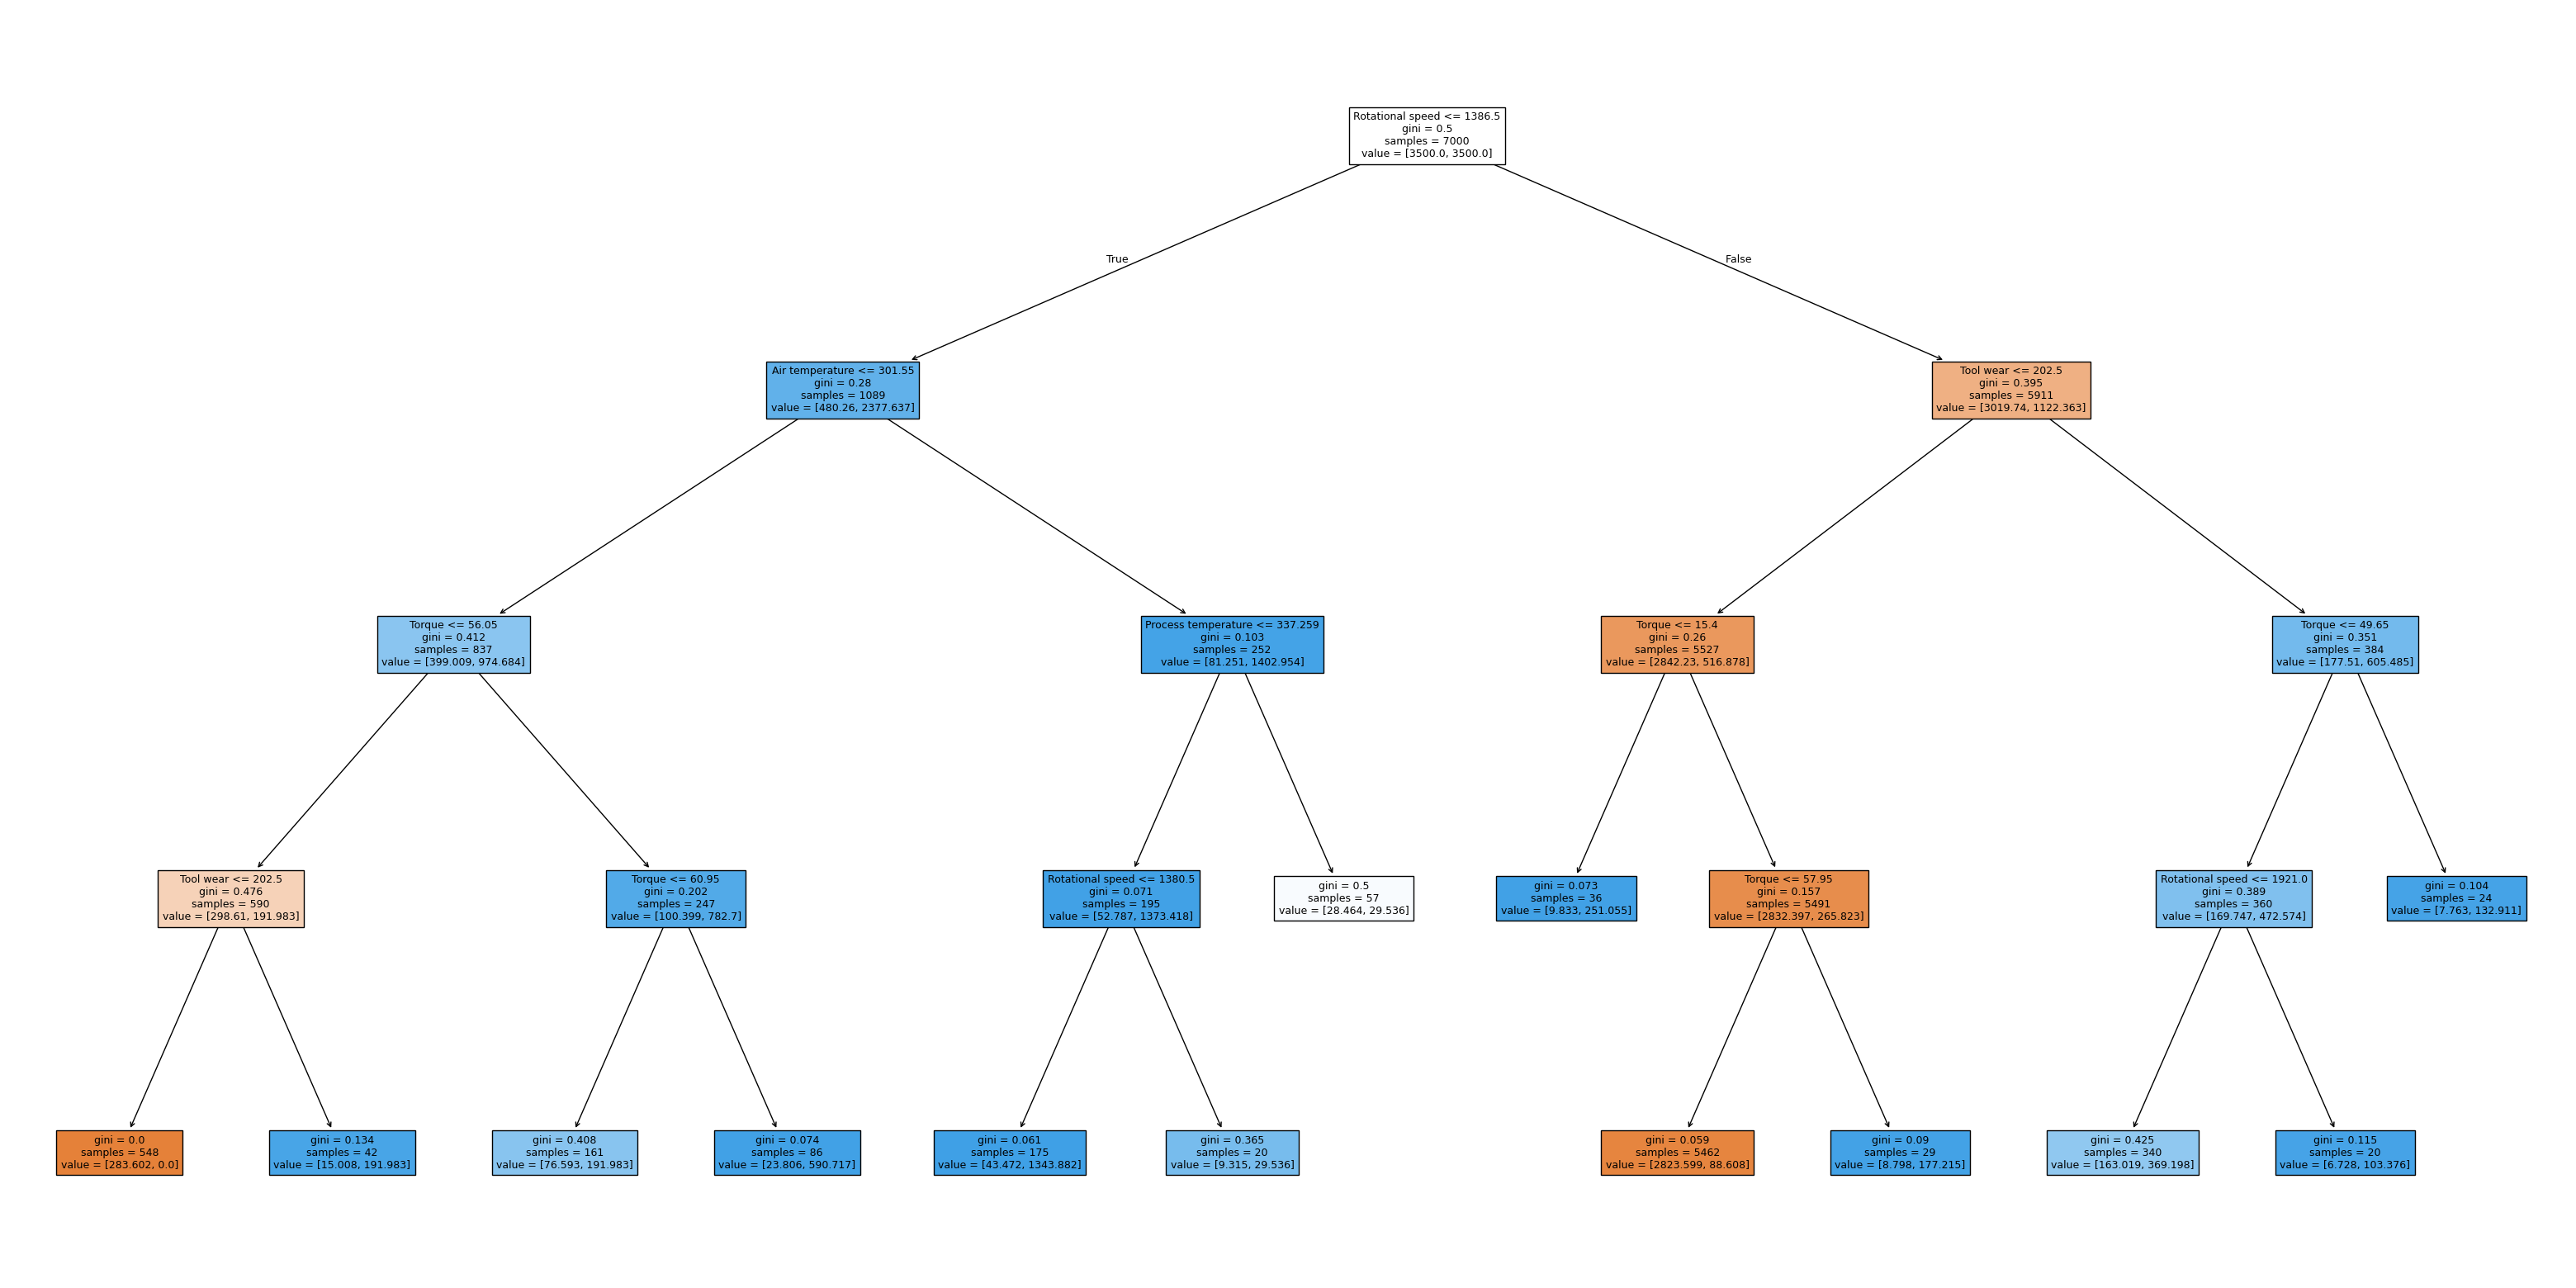

In [25]:
plt.figure(figsize=(40,20))

out = tree.plot_tree(
    model_dt_best,
    feature_names=feature_names,
    fontsize=9,
    filled=True,
    node_ids=False,
    class_names=None
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)


print(classification_report(y_train, y_train_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6763
           1       1.00      1.00      1.00       237

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.87      0.57      0.69       102

    accuracy                           0.98      3000
   macro avg       0.93      0.78      0.84      3000
weighted avg       0.98      0.98      0.98      3000



In [27]:
pos_count = (y_train == 1).sum()
neg_count = (y_train == 0).sum()

scale_pos_weight = neg_count/pos_count if pos_count > 0 else 1.0

In [29]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators = 300,
    max_depth = 4,
    learning_rate = 0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    n_jobs = -1
)

xgb_clf.fit(x_train, y_train)

y_train_pred_xgb = xgb_clf.predict(x_train)
y_test_pred_xgb = xgb_clf.predict(x_test)


print(classification_report(y_train, y_train_pred_xgb))
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6763
           1       0.85      1.00      0.92       237

    accuracy                           0.99      7000
   macro avg       0.92      1.00      0.96      7000
weighted avg       0.99      0.99      0.99      7000

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2898
           1       0.58      0.81      0.67       102

    accuracy                           0.97      3000
   macro avg       0.78      0.90      0.83      3000
weighted avg       0.98      0.97      0.98      3000



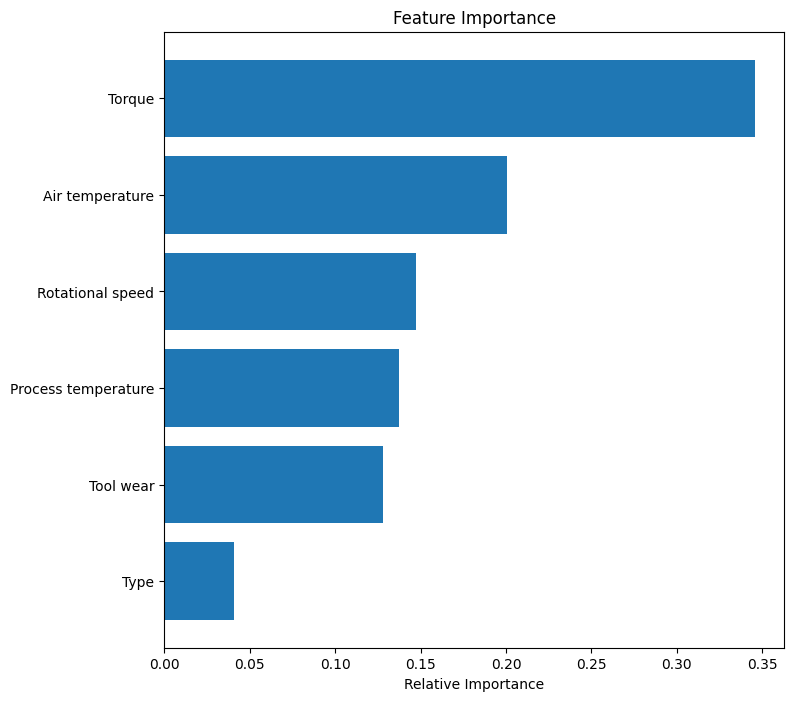

In [30]:
feature_importances = xgb_clf.feature_importances_
indicies = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title("Feature Importance")
plt.barh(range(len(indicies)), importances[indicies])
plt.yticks(range(len(indicies)), [feature_names[i] for i in indicies])
plt.xlabel("Relative Importance")
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_clf, x_train, y_train, cv=3)
print(scores)
print('\n')
print(scores.mean())


[0.97343616 0.97985426 0.97685384]


0.9767147540847126
